# C964 Computer Science Capstone - Ronnie Kaito Imagawa
# Video Game Global Sales Prediction Using Machine Learning

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

# Create the dataframe for the data set
df = pd.read_csv("vgsales.csv")

# Create X and y
Xshow = df.drop(['Rank','Name', 'Year', 'JP_Sales', 'Other_Sales', 'Global_Sales',"EU_Sales"], axis =1)
yshow = df["Global_Sales"]

# Instantiate a LabelEncoder
platLE= LabelEncoder()
genreLE = LabelEncoder()
pubLE= LabelEncoder()

# Apply label encoding to features that are originally strings
df['Platform'] = platLE.fit_transform(df['Platform'])
df['Genre'] = genreLE.fit_transform(df['Genre'])
df['Publisher'] = pubLE.fit_transform(df['Publisher'])

# Feature columns
X = df.drop(['Rank','Name', 'Year', 'JP_Sales', 'Other_Sales', 'Global_Sales',"EU_Sales"], axis =1)

# Target column
y = df["Global_Sales"]

# Instantiate a linear regression model
model = linear_model.LinearRegression()

# Split the data into training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Train the model
model.fit(X_train, y_train)

# Model's accuracy
accuracy = model.score(X_test, y_test)
print(f"Accuracy = {accuracy * 100:.2f}%")

# Use Mean Absolute Error (MAE) to evaluate the performance of the model
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
print(f"Mean Absolute Error (MAE): {mae:.2f}")



Accuracy = 85.79%
Mean Absolute Error (MAE): 0.20


# Visualizations

## Scatter Plot: Model Accuracy
The closer the dots are to the red dotted line, the more accurate.

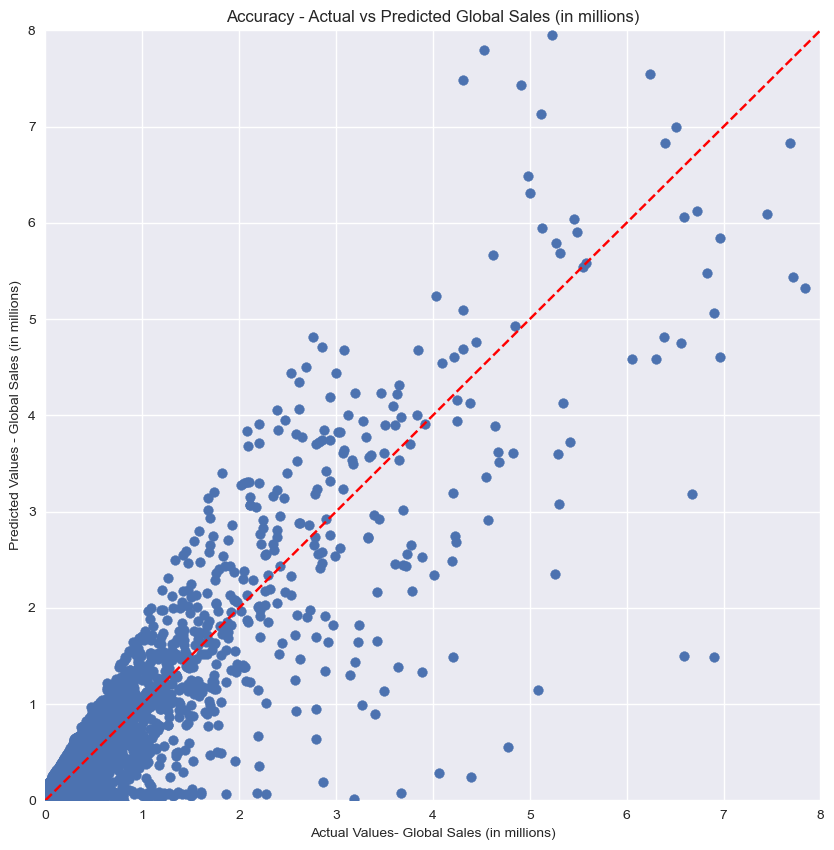

In [10]:
# Predicted Global Sales (in milions)
y_preds = model.predict(X_test)

# Creates a scatter plot that visualizes the accuracy of the model
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(x=y_test,
                    y=y_preds)
plt.axis([0, 8, 0, 8])
plt.style.use("seaborn-v0_8")
plt.xlabel('Actual Values- Global Sales (in millions)')
plt.ylabel('Predicted Values - Global Sales (in millions)')
plt.title('Accuracy - Actual vs Predicted Global Sales (in millions)')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle="--", color='r');


## Bar Graph: Distribution by Genre

Text(0.5, 0.98, 'Distribution by Genre')

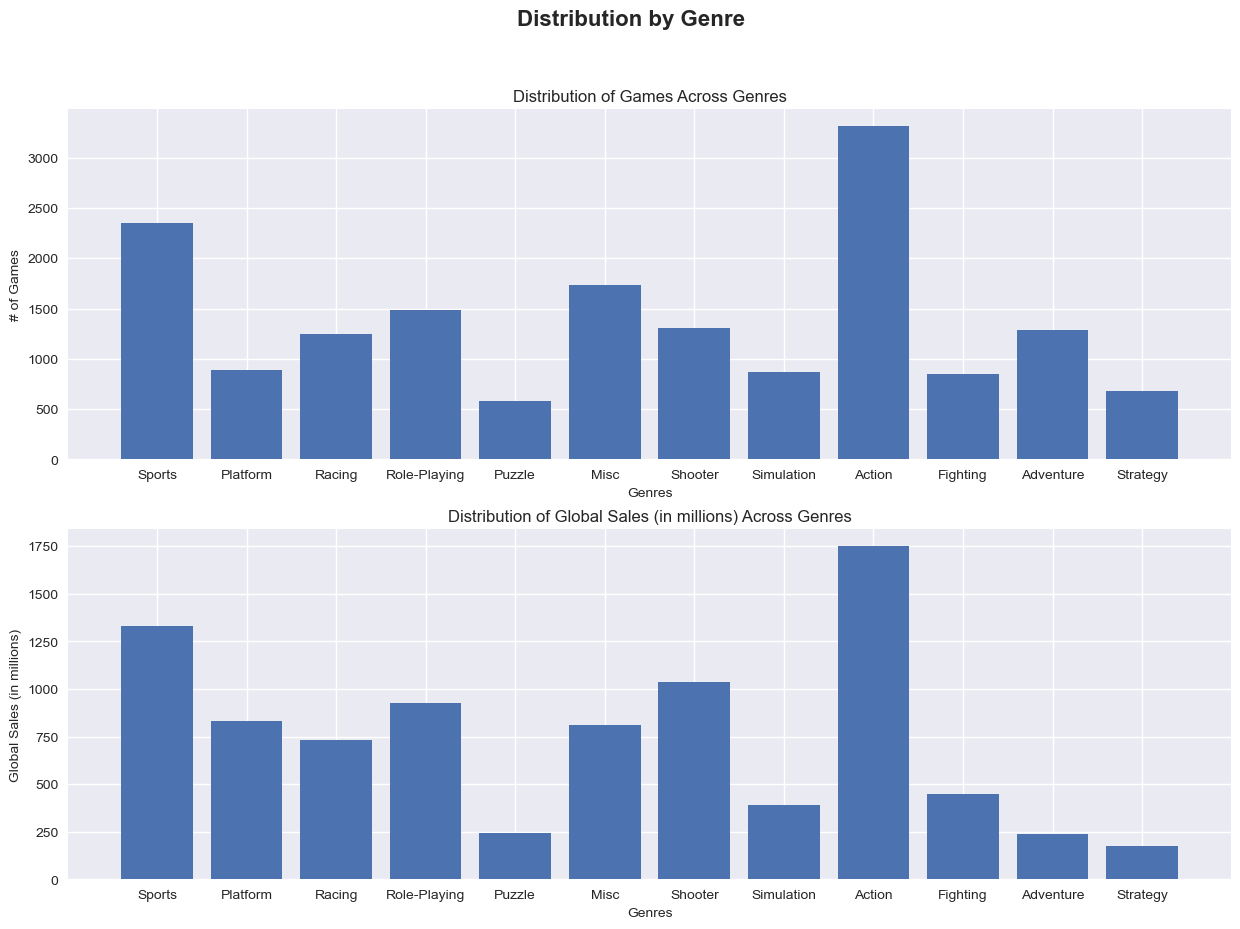

In [11]:
# Creates bar graphs that represent the distribution by genre
newdf = pd.read_csv("vgsales.csv")
genre_counts = newdf['Genre'].value_counts(sort=False)
groupGenres = newdf.groupby(['Genre'], sort=False)['Global_Sales'].sum()

fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(15,10))

bar = ax0.bar(genre_counts.index, genre_counts)
bar = ax1.bar(groupGenres.index, groupGenres)

ax0.set(title="Distribution of Games Across Genres",
       xlabel="Genres",
       ylabel="# of Games");
ax1.set(title="Distribution of Global Sales (in millions) Across Genres",
       xlabel="Genres",
       ylabel="Global Sales (in millions)");

fig.suptitle("Distribution by Genre", fontsize=16, fontweight='bold')

## Pie Chart: Global Sales Percentage By Top 10 Platforms

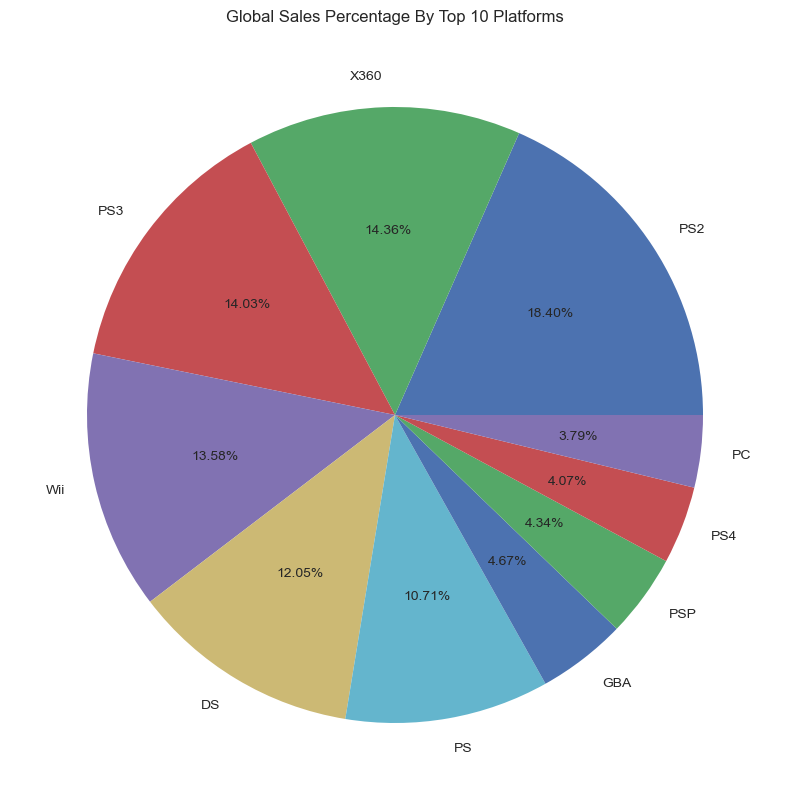

In [12]:
# Pie Chart: Global Sales Percentage By Top 10 Platforms
group = newdf.groupby(['Platform'])['Global_Sales'].sum()
top10 = group.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 10))

plt.pie(top10, labels=top10.index, autopct='%.2f%%')
plt.rcParams['font.size'] = 10
plt.title("Global Sales Percentage By Top 10 Platforms" );

In [13]:
df.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,5,1989.0,5,359,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,4,2006.0,4,359,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,26,2006.0,3,359,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,26,2009.0,4,359,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,11,1984.0,8,359,26.93,0.63,0.28,0.47,28.31


# User Interface

In [14]:
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

# Gather all the lists of all of the unique values for the dropdown boxes.
genres = genreLE.inverse_transform(df["Genre"].unique())
platforms = platLE.inverse_transform(df["Platform"].unique())
publishers = pubLE.inverse_transform(df["Publisher"].unique())

# Create each dropdown box
dropdown1 = widgets.Dropdown(options=genres, description='Genre: ')
dropdown2 = widgets.Dropdown(options=platforms, description='Platform: ')
dropdown3 = widgets.Dropdown(options=publishers, description='Publisher: ')

# Create a float box for US Sales
style = {'description_width': 'initial'}
float_box = widgets.BoundedFloatText(value=0.0, min=0.0, max=10.0, step=0.1, description='US Sales (in millions):', style=style)

# Submit button to launch the prediction model
button = widgets.Button(description="Predict Global Sales!", disabled = False, button_style="success")

# Function that arranges the values into a dataframe and inputs it into the predictive model
def predictGlobalSales(button):
    clear_output(wait=True)
    display(dropdown1, dropdown2, dropdown3, float_box, button)
    selectedGenre = dropdown1.value
    selectedPlatform = dropdown2.value
    selectedPublisher = dropdown3.value
    usSales = float_box.value
    
    # Label encodes the user inputs
    selGenre = genreLE.transform([selectedGenre])
    selPlat = platLE.transform([selectedPlatform])
    selPub = pubLE.transform([selectedPublisher])
    
    # Transforms data into a dataframe
    inputList = np.concatenate((selGenre, selPlat, selPub, [usSales]))
    reshaped_array = np.reshape(inputList, (1, 4))
    inputDf = pd.DataFrame(reshaped_array, columns=["Platform", "Genre", "Publisher", "NA_Sales"])
    
    # Linear regression model to predict global sales
    result = model.predict(inputDf)
    
    # Print results
    print(f'SELECTED GAME:\n=============\nPlatform = {selectedPlatform}\nGenre = {selectedGenre}\nPublisher = {selectedPublisher}\nUS Sales = {usSales} million units sold')
    print(f'\nThe estimated amount of global sales for your game is:{result[0]: .2f} million units sold\n')
    




# Try it out! Video Game Global Sales Predictor
## Pick the game characteristics and click the green button

In [15]:
# Display all widgets
display(dropdown1, dropdown2, dropdown3, float_box, button)
button.on_click(predictGlobalSales)


Dropdown(description='Genre: ', options=('Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Sh…

Dropdown(description='Platform: ', options=('Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', '3D…

Dropdown(description='Publisher: ', options=('Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive', 'So…

BoundedFloatText(value=0.0, description='US Sales (in millions):', max=10.0, step=0.1, style=DescriptionStyle(…

Button(button_style='success', description='Predict Global Sales!', style=ButtonStyle())